# How to get a mesh from an MRI image?

In [1]:
import pyvista as pv

import polpo.preprocessing.dict as ppdict
from polpo.preprocessing.load.pregnancy.pilot import (
    HippocampalSubfieldsSegmentationsLoader,
    MriLoader,
)
from polpo.preprocessing.mesh.conversion import PvFromData
from polpo.preprocessing.mri import (
    MeshExtractorFromSegmentedImage,
    SkimageMarchingCubes,
)

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


In [2]:
STATIC_VIZ = True

if STATIC_VIZ:
    pv.set_jupyter_backend("static")

## Loading data

Following [How to visualize MRI data?](./viz_mri.ipynb), we start by [getting the image data](./load_figshare_data.ipynb).

In [3]:
SESSION_ID = 1

In [4]:
loader = MriLoader(subset=[SESSION_ID], as_image=True)

pipe = loader + ppdict.ExtractUniqueKey()

In [5]:
img_fdata = pipe()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/raw/mri').


## Marching cubes

We now use [marching cubes](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.marching_cubes
) and transform the output to [pyvista.PolyData](https://docs.pyvista.org/api/core/_autosummary/pyvista.polydata) for visualization.

In [6]:
mesh_from_image = SkimageMarchingCubes()

In [7]:
mesh = (mesh_from_image + PvFromData())(img_fdata)

## Visualization

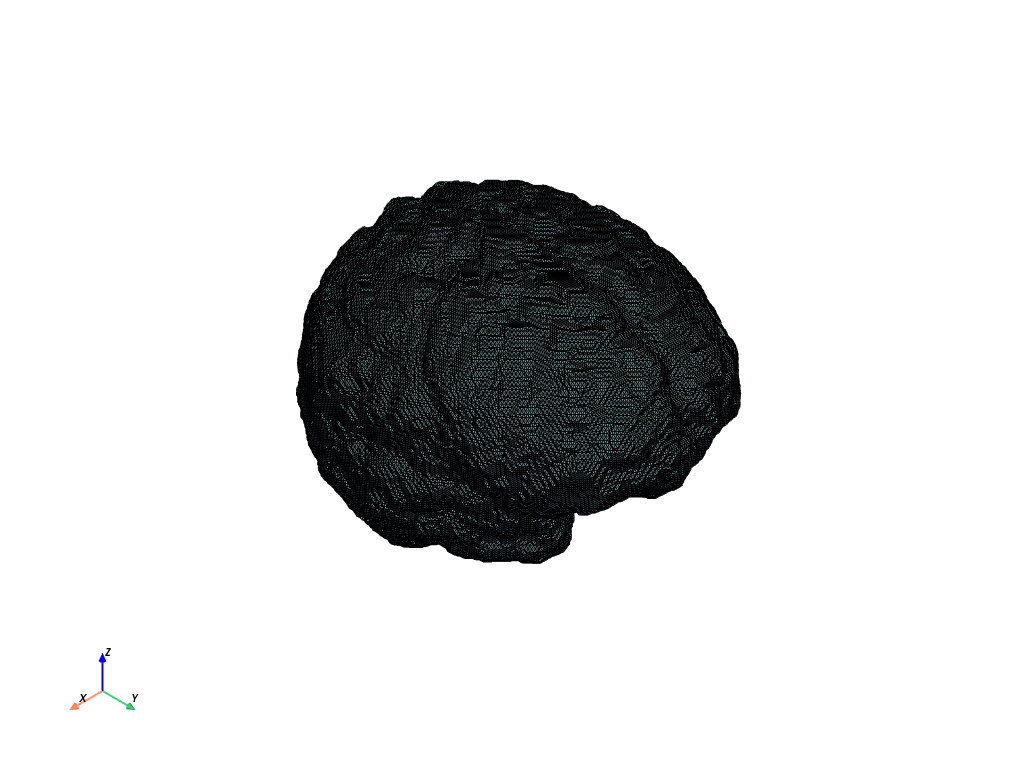

In [8]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

## Segmented data

Load the segmented data.

In [9]:
pipe = (
    HippocampalSubfieldsSegmentationsLoader(subset=[SESSION_ID], as_image=True)
    + ppdict.ExtractUniqueKey()
)

In [10]:
img_fdata = pipe()

INFO: Data has already been downloaded... using cached file ('/home/luisfpereira/.herbrain/data/pregnancy/derivatives/segmentations').


The process changes only slightly when the data is segmented. (NB: `encoding` informs about the tool used for segmentation, which matters to map ids to tool ids and colors.)

In [11]:
img2mesh = (
    MeshExtractorFromSegmentedImage(
        return_colors=True,
        encoding="ashs",
    )
    + PvFromData()
)

mesh = img2mesh(img_fdata)

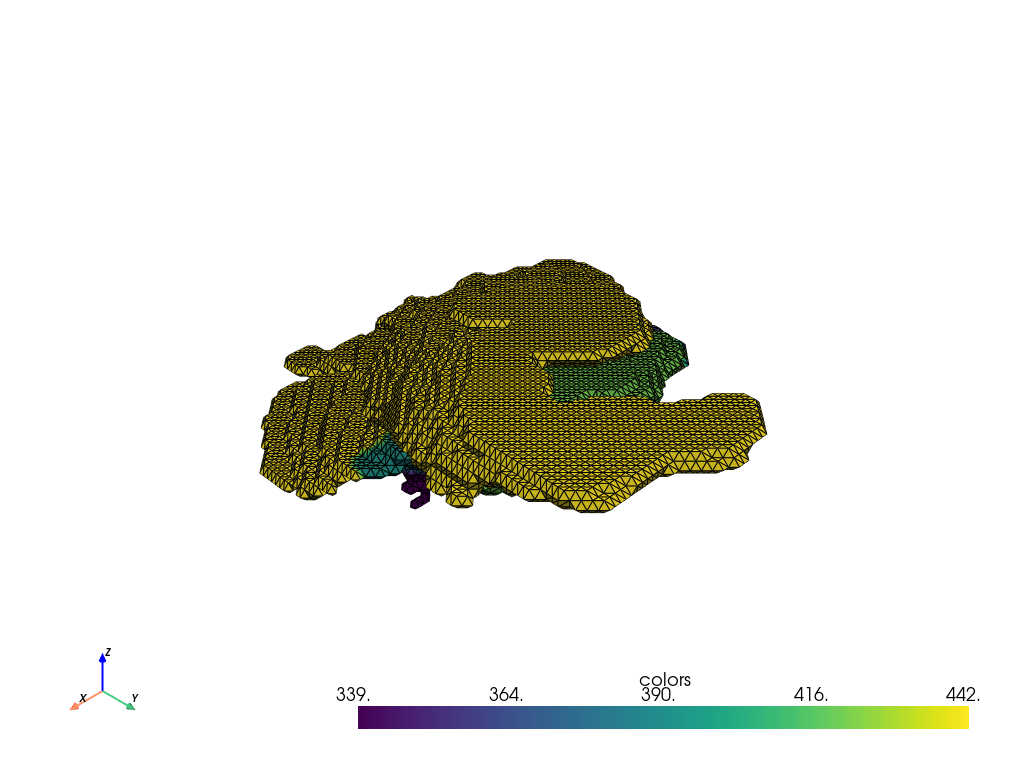

In [12]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

For example, we can select a particular subfield of the hippocampus.

In [13]:
img2mesh = (
    MeshExtractorFromSegmentedImage(
        struct_id="PostHipp", return_colors=False, encoding="ashs"
    )
    + PvFromData()
)

mesh = img2mesh(img_fdata)

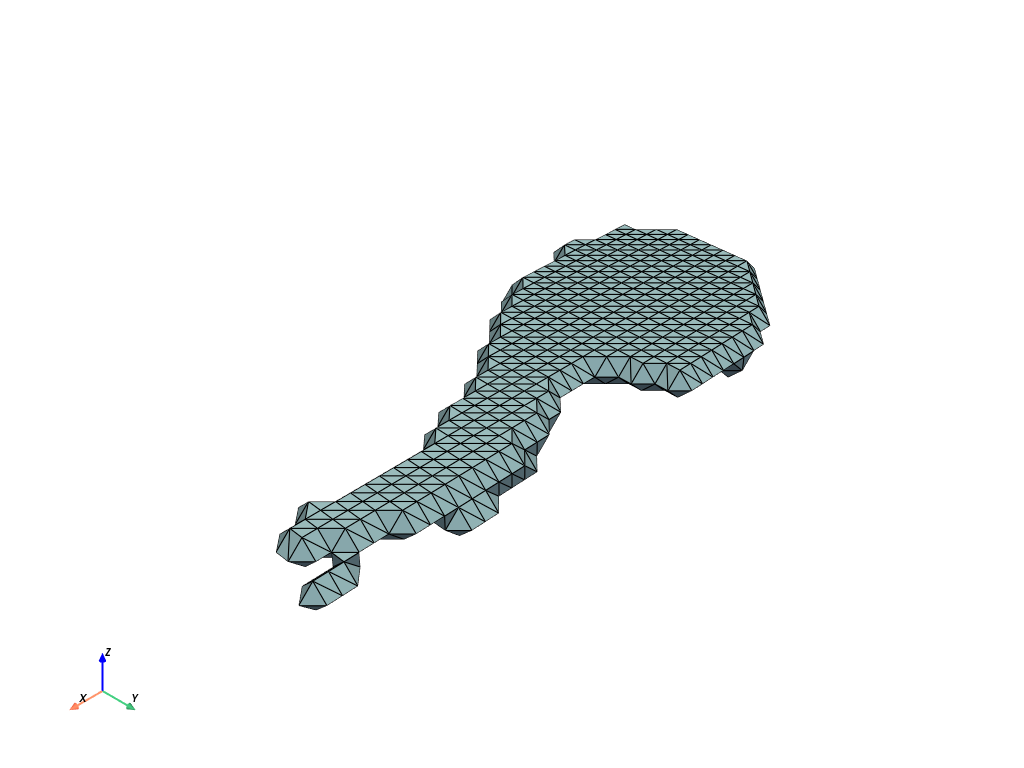

In [14]:
pl = pv.Plotter(border=False)

pl.show_axes()
pl.add_mesh(mesh, show_edges=True)
pl.show()

## Further reading

* [How to select a mesh subset?](./hipp_substructures.ipynb)